<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewer's comment v1</h1>

Hello Dinesh!

I'm happy to review your project today 🙌

You can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments
</div>

Please don't remove my comments :) If you have any questions don't hesitate to respond to my comments in a different section. 
<div class="alert alert-info"> <b>Student comments:</b> For example like this</div>    


<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v1:</b>

    
<b>Overall Feedback</b>
    
Hello Dinesh,
    
Another project successfully completed - well done! 🏆 Your consistent effort and progress are truly commendable.

Our team is here to help you keep pushing forward and honing your skills as you advance through the program.
      
You can find my more detailed notes within your project notebook in the `Reviewer's comment v1:` section.
   
Congratulations again on your accomplishment! Each project you complete adds to your growing expertise, and it’s exciting to see you make such great strides. Keep up the great work! 🎯

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1</b>
    
It would be immensely helpful if you can add some contextual information at the beginning of the notebook, covering:

- A brief description of the project's objective.
- An overview of the data you're working with.
- Any expected outcomes or results you aim to achieve.

Providing such context allows anyone reviewing or revisiting the notebook to quickly understand its purpose and the data being used, ensuring smoother collaboration and more intuitive navigation.

</div>

In [1]:
import pandas as pd

In [2]:
df_instacart_orders=pd.read_csv('/datasets/instacart_orders.csv',sep=';')
df_instacart_orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [3]:
df_products=pd.read_csv('/datasets/products.csv',sep=';')
df_products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [4]:
df_order_products=pd.read_csv('/datasets/order_products.csv',sep=';')
df_order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [5]:
df_aisles=pd.read_csv('/datasets/aisles.csv',sep=';')
df_aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [6]:
df_departments=pd.read_csv('/datasets/departments.csv',sep=';')
df_departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [7]:
# Check for duplicated orders
print(df_instacart_orders.duplicated().sum())


15


In [8]:
# Check for all orders placed Wednesday at 2:00 AM
wed_2am_orders=df_instacart_orders[(df_instacart_orders['order_dow']==3) & (df_instacart_orders['order_hour_of_day']==2)]
print(wed_2am_orders)


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

In [9]:
# Remove duplicate orders

df_instacart_orders= df_instacart_orders.drop_duplicates()
df_instacart_orders.sample(5)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
112236,1932810,100199,8,6,21,11.0
363946,734674,137829,30,1,14,22.0
117827,1884061,131428,5,6,22,2.0
417591,3025298,162760,17,2,16,4.0
65564,2559039,199970,5,0,16,8.0


<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1</b>

This code removes the duplicate rows from the DataFrame.
However it doesn't reset the index of the DataFrame. This means that if rows were removed, there could be gaps in the DataFrame's index.

In many cases, especially when the index doesn't have any specific meaning, resetting the index after dropping duplicates provides a cleaner result. You can achieve that in the following way: 

`orders.drop_duplicates().reset_index(drop=True)`

The `reset_index(drop=True)` method is then called on the result, which resets the DataFrame's index and drops the old index. This ensures there are no gaps in the index after removing duplicates.
    

In [10]:
# Double check for duplicate rows
print(df_instacart_orders.duplicated().sum())


0


In [11]:
# Double check for duplicate order IDs only
print(df_instacart_orders['order_id'].value_counts())

1048576    1
3389216    1
1100604    1
1275704    1
2337103    1
          ..
1752059    1
2794488    1
711671     1
1711087    1
2047       1
Name: order_id, Length: 478952, dtype: int64


In [12]:
print(df_instacart_orders['order_id'].duplicated().sum())

0


There are no duplicated values in the dataframe and the order-id column as well.

### `products` data frame

In [13]:
# Check for fully duplicate rows
duplictaes=df_products.duplicated().sum()
print(duplictaes)


0


In [14]:
# Check for just duplicate product IDs
print(df_products['product_id'].duplicated().sum())


0


In [15]:
# Check for just duplicate product names (convert names to lowercase to compare better)
num_duplicates = df_products['product_name'].str.lower().duplicated().sum()
print(num_duplicates)


1361


In [16]:
# Check for duplicate product names that aren't missing
num_duplicates = df_products['product_name'].dropna().str.lower().duplicated().sum()

print(num_duplicates)


104


There are no fully duplictated rows are present, but there are some product names are duplicated in the dataframe.

### `departments` data frame

In [17]:
print(df_departments.duplicated().sum())

0


In [18]:
print(df_departments['department'].str.lower().duplicated().sum())

0


There are no department rows and the departments names as well.

### `aisles` data frame

In [19]:
print(df_aisles.duplicated().sum())

0


In [20]:
print(df_aisles['aisle'].str.lower().duplicated().sum())

0


There are no duplicates in the aisles dataframe and in the aisle column as well.

### `order_products` data frame

In [21]:
# Check for fullly duplicate rows
print(df_order_products.duplicated().sum())


0


In [22]:
# Double check for any other tricky duplicates
print(df_order_products['order_id'].duplicated().sum())

4094961


there are no fully duplictaed rows, but there shouldn't be any duplictated order_ids, because each order have an unique order_id, i don't understand why i got these many duplicated order ids.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>

You've done a good job at checking duplicates in the table.

## Find and remove missing values


### `products` data frame

In [23]:
#checking missing values with info()
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [24]:
df_products['product_name'].isnull().sum()

1258

There are no missing values product_id, aisle_id, and department_id, but there are 1258 missing values in the product_name column.

In [25]:
# Are all of the missing product names associated with aisle ID 100?
print(df_products[df_products['product_name'].isna()]['aisle_id']==100)


37       True
71       True
109      True
296      True
416      True
         ... 
49552    True
49574    True
49640    True
49663    True
49668    True
Name: aisle_id, Length: 1258, dtype: bool


Yes, all the 1258 of the missing names associated with aisle id 100.

In [26]:
# Are all of the missing product names associated with department ID 21?
print(df_products[df_products['product_name'].isna()]['department_id']==21)


37       True
71       True
109      True
296      True
416      True
         ... 
49552    True
49574    True
49640    True
49663    True
49668    True
Name: department_id, Length: 1258, dtype: bool


yes, all of the 1258 missing product names are assosiated with department id 21

In [27]:
# What is this ailse and department?
print(df_aisles[df_aisles['aisle_id']==100]['aisle'])
print(df_departments[df_departments['department_id']==21]['department'])


99    missing
Name: aisle, dtype: object
20    missing
Name: department, dtype: object


the corresponding aisle name and the department names are also missing

In [28]:
# Fill missing product names with 'Unknown'
df_products=df_products.fillna('Unknown')


In [29]:
df_products['product_name'].isnull().sum()

0

After replacing missing values with 'unknown' there are no missing values now.

### `orders` data frame

In [30]:
df_instacart_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478952 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 25.6 MB


there are no missing values in any column except one column named 'days_since_prior_order'

In [31]:
# Are there any missing values where it's not a customer's first order?
missing_values=df_instacart_orders[(df_instacart_orders['order_number'] > 1) & 
                                     (df_instacart_orders['days_since_prior_order'].isnull())]
missing_values.empty


True

yes, there are missing values where it's not a customer's first order

### `order_products` data frame

In [32]:
df_order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [33]:
df_order_products.isnull().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

it seems there are missing values in add_to_cart_order column

In [34]:
# What are the min and max values in this column?

df_order_products.describe()

,order_id,product_id,add_to_cart_order,reordered
count,4.545007e+06,4.545007e+06,4.544171e+06,4.545007e+06
mean,1.711166e+06,2.558084e+04,8.351669e+00,5.905025e-01
std,9.850955e+05,1.409552e+04,7.080368e+00,4.917411e-01
min,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.608170e+05,1.353500e+04,3.000000e+00,0.000000e+00
50%,1.711530e+06,2.527200e+04,6.000000e+00,1.000000e+00
75%,2.561311e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421079e+06,4.969400e+04,6.400000e+01,1.000000e+00


In [35]:
min_value = df_order_products['add_to_cart_order'].min()
max_value = df_order_products['add_to_cart_order'].max()

min_value, max_value

(1.0, 64.0)

In [36]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
order_ids_missing = df_order_products[df_order_products['add_to_cart_order'].isnull()]['order_id'].unique()
order_ids_missing

array([2449164, 1968313, 2926893, 1717990, 1959075,  844733,   61355,
        936852,  264710, 1564093,  129627,  293169, 2849370, 1386261,
       3308010,  903110, 2136777, 3347453, 1888628,  165801, 2094761,
       1038146, 2997021,  813364, 2256933,  171934, 2409109, 1730767,
       1169835,  733526,  404157, 3125735,  747668, 1800005, 1961723,
        871281,  388234, 1648217, 1477139,  102236, 1021563, 1832957,
       2721963,  678116, 1220886, 1673227, 2999801, 1633337, 2470674,
       2625444, 1677118, 2479011, 3383594, 1183255, 1713430, 2652650,
       1598369, 1916118,  854647, 1302315,  888470,  180546, 2621907,
       1308785, 2729254,    9310, 2170451, 2979697, 1625713, 1529171])

In [37]:
# Do all orders with missing values have more than 64 products?
print((df_order_products[df_order_products['add_to_cart_order'].isnull()]['order_id'].value_counts() > 64).all())

False


not all the missing values have more than 64 products.

In [38]:
# Replace missing values with 999 and convert column to integer type
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna(999).astype(int)


replaced all the missing values in the add_to_cart_order with 999.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>

Overall, your exploration and cleaning process is well-thought-out. 

You correctly identified and addressed NaN values in `product_name`, `days_since_prior_order`, `add_to_cart_order`. 

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1</b>

If you're repeating the same set of operations (like checking info, printing the head, checking for NaNs, and checking for duplicates) for each dataframe, consider creating a function to perform these checks. This will make your code cleaner and more efficient.

````
def analyze_data(df):
    # Info
    print(df.info())
    
    # First few rows
    print(df.head())
    
    # Missing values
    print(df.isna().sum())
    
    # Duplicates
    print(df.duplicated().sum())

# Use the function
analyze_data(aisles)
analyze_data(departments)
# ... and so on for other dataframes
````
    


# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [39]:
hour_min, hour_max =df_instacart_orders['order_hour_of_day'].min(), df_instacart_orders['order_hour_of_day'].max()
print(hour_min, hour_max)


0 23


In [40]:
dow_min, dow_max = df_instacart_orders['order_dow'].min(), df_instacart_orders['order_dow'].max()
print(dow_min, dow_max)

0 6


order_hour_of the day lies between 0 and 23, and the order_dow is lies lies between 0 to 6.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>

As a second approach you could use `.describe()` function for getting an initial understanding of data, especially for numeric columns. However, this function might return descriptive statistics for all numeric columns in the dataframe. If you are interested in specific columns, you might want to narrow it down.

`instacart[['order_hour_of_day', 'order_dow']].describe()`


### [A2] What time of day do people shop for groceries?

<AxesSubplot:title={'center':'Orders by Hour of Day'}, xlabel='Hour of Day', ylabel='Number of Orders'>

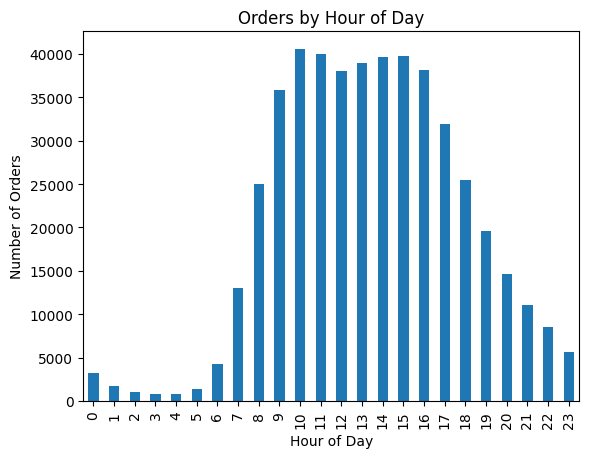

In [41]:
import matplotlib.pyplot as plt
order_counts_by_hour = df_instacart_orders['order_hour_of_day'].value_counts().sort_index()
order_counts_by_hour.plot(kind='bar', title='Orders by Hour of Day', xlabel='Hour of Day', ylabel='Number of Orders')

it seems at 10 people are shopping more grocerries.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>

Well done! 

### [A3] What day of the week do people shop for groceries?

<AxesSubplot:title={'center':'Orders by Day of the Week'}, xlabel='Day of the Week (0=Sunday)', ylabel='Number of Orders'>

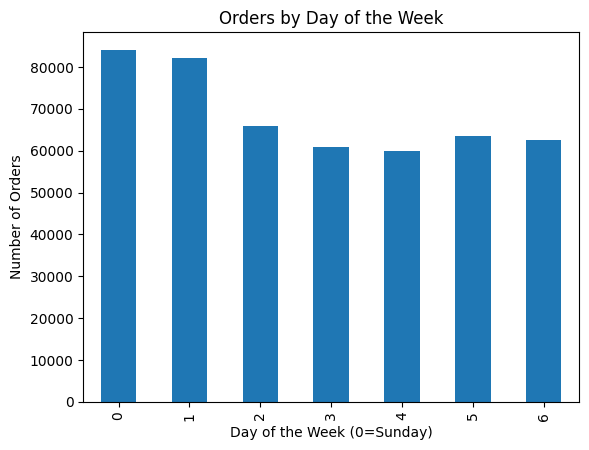

In [42]:
order_counts_by_day = df_instacart_orders['order_dow'].value_counts().sort_index()
order_counts_by_day.plot(kind='bar', title='Orders by Day of the Week', xlabel='Day of the Week (0=Sunday)', ylabel='Number of Orders')

on sundays people are shopping more grocerries.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>

Everything is correct here. 

### [A4] How long do people wait until placing another order?

In [43]:
wait_stats = df_instacart_orders['days_since_prior_order'].describe()
print(wait_stats)

count    450135.000000
mean         11.101814
std           9.190004
min           0.000000
25%           4.000000
50%           7.000000
75%          15.000000
max          30.000000
Name: days_since_prior_order, dtype: float64


on an average people are waiting 11 days until placing another order.

<AxesSubplot:title={'center':'Distribution of Days Since Prior Order'}, ylabel='Frequency'>

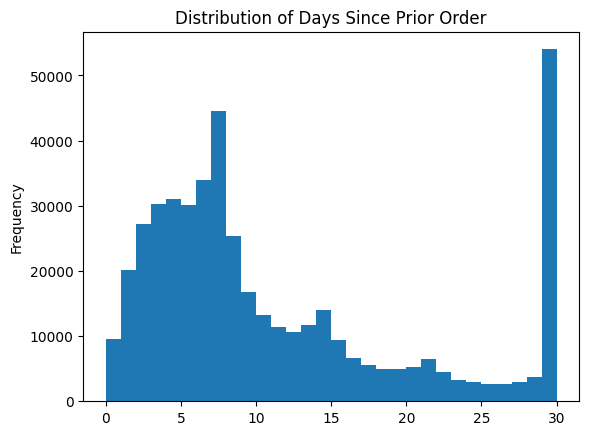

In [44]:
df_instacart_orders['days_since_prior_order'].plot(kind='hist', bins=30, title='Distribution of Days Since Prior Order', xlabel='Days', ylabel='Frequency')

it seems max 30 days and 7 days is the median, so people are waiting one week to 30 days to buy groceries.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>

Well done! 

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [45]:
wednesday_orders = df_instacart_orders[df_instacart_orders['order_dow'] == 3]['order_hour_of_day']
saturday_orders = df_instacart_orders[df_instacart_orders['order_dow'] == 5]['order_hour_of_day']

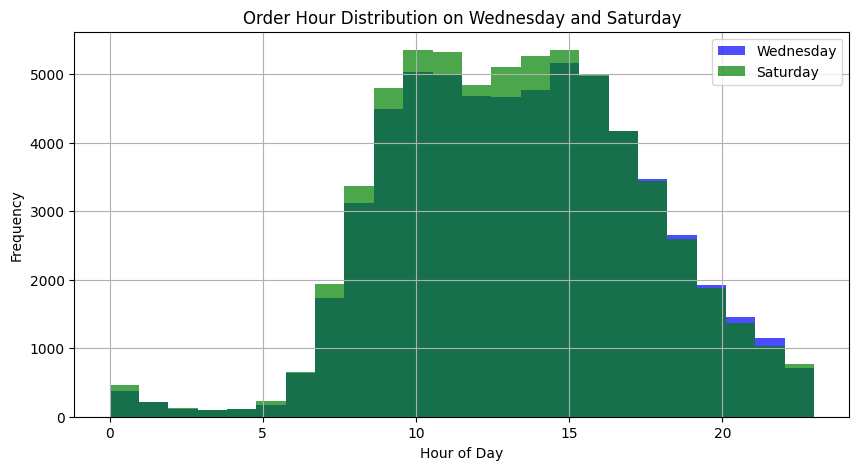

In [46]:
wednesday_orders.hist(bins=24, range=(0, 23), alpha=0.7, label='Wednesday', color='blue', figsize=(10, 5))
saturday_orders.hist(bins=24, range=(0, 23), alpha=0.7, label='Saturday', color='green')
plt.title('Order Hour Distribution on Wednesday and Saturday')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.legend()
plt.show()

people are shopping higher on saturdays throught out the day except last hours of the saturday, but people tend to shop more at late hours on wednesday than on saturdays.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
Everything is correct here. 

### [B2] What's the distribution for the number of orders per customer?

In [47]:
orders_per_customer = df_instacart_orders['user_id'].value_counts()

<AxesSubplot:title={'center':'Distribution of Orders per Customer'}, ylabel='Frequency'>

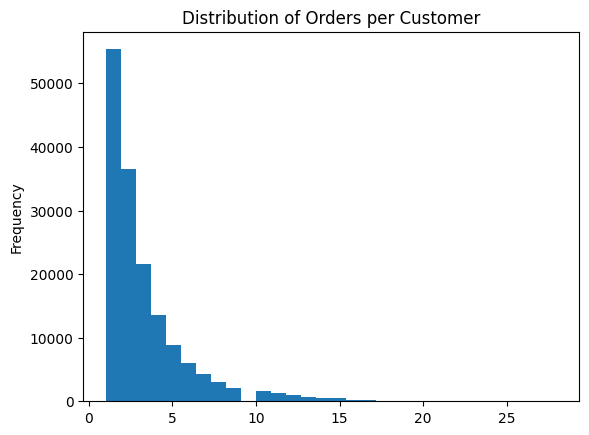

In [48]:
orders_per_customer.plot(kind='hist', bins=30, title='Distribution of Orders per Customer', xlabel='Number of Orders', ylabel='Number of Customers')

this means most people ordered less number of orders, the peak of the distribution has 0 to 5 orders, as the number of orders increased, number of customers decreases rapidly.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
Everything is correct here. 

### [B3] What are the top 20 popular products (display their id and name)?

In [49]:
top_products = df_order_products['product_id'].value_counts().head(20).reset_index()
top_products.columns = ['product_id', 'order_count']

In [50]:
top_products_with_names = top_products.merge(df_products[['product_id', 'product_name']], on='product_id')

In [51]:
top_products_with_names[['product_id', 'product_name', 'order_count']]

,product_id,product_name,order_count
0,24852,Banana,66050
1,13176,Bag of Organic Bananas,53297
2,21137,Organic Strawberries,37039
3,21903,Organic Baby Spinach,33971
4,47209,Organic Hass Avocado,29773
5,47766,Organic Avocado,24689
6,47626,Large Lemon,21495
7,16797,Strawberries,20018
8,26209,Limes,19690
9,27845,Organic Whole Milk,19600


these are the top 20 highest selling products, bananas are selling higher 

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
Great work! Additionally, you could plot the results on this query in the following way: 

```
plt.figure(figsize=(10,6))
plt.barh(top_20_popular['product_name'], top_20_popular['product_id'], color='skyblue')
plt.xlabel('Product ID')
plt.ylabel('Product Name')
plt.title('Barplot of Product IDs against Product Names')
plt.gca().invert_yaxis()  # To have the first product on top
plt.tight_layout()
plt.show()   
```

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [52]:
items_per_order = df_order_products.groupby('order_id').size()

In [53]:
average_items = items_per_order.mean()
print(f'Average number of items per order: {average_items:.2f}')

Average number of items per order: 10.10


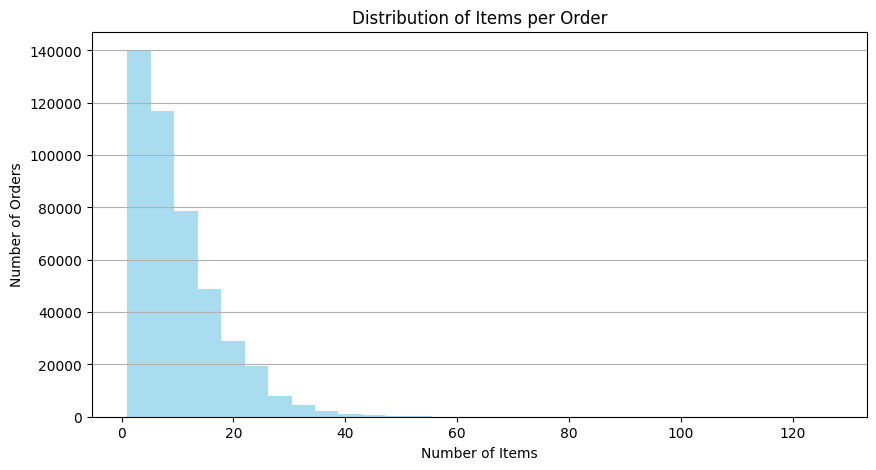

In [54]:
plt.figure(figsize=(10, 5))
items_per_order.plot(kind='hist', bins=30, color='skyblue', alpha=0.7)
plt.title('Distribution of Items per Order')
plt.xlabel('Number of Items')
plt.ylabel('Number of Orders')
plt.grid(axis='y')
plt.show()

average number of items per order are 10, the distribution shows that number of people decreses when number of items increases.

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1</b>
    
Everything is correct here. 
 
Using `axvline` can be very helpful in this context. It allows you to draw a vertical line on the plot at a specified x-value. For instance:

You can use it to mark the mean of the data, giving a visual representation of where the average lies.
    
Adding these lines can provide additional insight into the distribution of the data, making it easier to understand the typical behavior (like where the central tendency of the data is) and variability (how spread out the data points are).

If you choose to use axvline, here's a quick example for the `mean`:
```
plt.hist(items_per_order, bins=range(1, 52), alpha=0.7)
plt.axvline(items_per_order.mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.legend()
plt.xlabel('Number of items')
plt.ylabel('Number of orders')
plt.title('Distribution of items per order')
plt.show()
```
</div>


### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [55]:
reordered=df_order_products[df_order_products['reordered'] == 1]

In [56]:
top_reordered = reordered['product_id'].value_counts().head(20).reset_index()
top_reordered.columns = ['product_id', 'reorder_count']

In [57]:
top_reordered_names = top_reordered.merge(df_products[['product_id', 'product_name']], on='product_id')

In [58]:
top_reordered_names[['product_id', 'product_name', 'reorder_count']]

,product_id,product_name,reorder_count
0,24852,Banana,55763
1,13176,Bag of Organic Bananas,44450
2,21137,Organic Strawberries,28639
3,21903,Organic Baby Spinach,26233
4,47209,Organic Hass Avocado,23629
5,47766,Organic Avocado,18743
6,27845,Organic Whole Milk,16251
7,47626,Large Lemon,15044
8,27966,Organic Raspberries,14748
9,16797,Strawberries,13945


these are the top 20 most frequently reordered items, banana is in the top most position.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
You got correct results. You could create a graph with this information. I left an example of how to do that above.
    
PS: in many cases it is helpful to support your results with a plot (barchart in that case). 

### [C3] For each product, what proportion of its orders are reorders?

In [59]:
total_orders = df_order_products['product_id'].value_counts()
reorder_counts = df_order_products[df_order_products['reordered'] == 1]['product_id'].value_counts()

In [60]:
reorder_proportion = (reorder_counts / total_orders).fillna(0).reset_index()
reorder_proportion.columns = ['product_id', 'reorder_proportion']

In [61]:
result = reorder_proportion.merge(df_products[['product_id', 'product_name']], on='product_id')
result[['product_id', 'product_name', 'reorder_proportion']]

,product_id,product_name,reorder_proportion
0,1,Chocolate Sandwich Cookies,0.564286
1,2,All-Seasons Salt,0.000000
2,3,Robust Golden Unsweetened Oolong Tea,0.738095
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,0.510204
4,7,Pure Coconut Water With Orange,0.500000
...,...,...,...
45568,49690,HIGH PERFORMANCE ENERGY DRINK,0.800000
45569,49691,ORIGINAL PANCAKE & WAFFLE MIX,0.430556
45570,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,0.416667
45571,49693,SPRING WATER BODY WASH,0.440000


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
Everything is correct here. 

### [C4] For each customer, what proportion of their products ordered are reorders?

In [62]:
merged_data = df_instacart_orders.merge(df_order_products, on='order_id')
total_orders_per_customer = merged_data.groupby('user_id').size()

In [63]:
reorder_counts_per_customer = merged_data[merged_data['reordered'] == 1].groupby('user_id').size()

In [64]:
reorder_proportion_per_customer = (reorder_counts_per_customer / total_orders_per_customer).fillna(0).reset_index()
reorder_proportion_per_customer.columns = ['user_id', 'reorder_proportion']
reorder_proportion_per_customer

,user_id,reorder_proportion
0,2,0.038462
1,4,0.000000
2,5,0.666667
3,6,0.000000
4,7,0.928571
...,...,...
149621,206203,0.222222
149622,206206,0.714286
149623,206207,0.891304
149624,206208,0.696000


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>

Everything is correct here. 

### [C5] What are the top 20 items that people put in their carts first? 

In [65]:
first_items = df_order_products[df_order_products['add_to_cart_order'] == 1]

In [66]:
top_first_added_products = first_items['product_id'].value_counts().head(20).reset_index()
top_first_added_products.columns = ['product_id', 'first_added_count']

In [67]:
top_first_added_products_with_names = top_first_added_products.merge(df_products[['product_id', 'product_name']], on='product_id')

In [68]:
top_first_added_products_with_names[['product_id', 'product_name', 'first_added_count']]

,product_id,product_name,first_added_count
0,24852,Banana,15562
1,13176,Bag of Organic Bananas,11026
2,27845,Organic Whole Milk,4363
3,21137,Organic Strawberries,3946
4,47209,Organic Hass Avocado,3390
5,21903,Organic Baby Spinach,3336
6,47766,Organic Avocado,3044
7,19660,Spring Water,2336
8,16797,Strawberries,2308
9,27966,Organic Raspberries,2024


these are the top 20 items that are being added as a first item, banana is at the top, that means most of the times, it is added as a first item to the cart.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
Great! You did an amazing job. 